In [9]:

!pip install numpy pandas matplotlib seaborn 



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [2]:
import os

file_path = r'C:\Users\AMIT\OneDrive\Documents\Data Analyst_Internship_Projects\Olympics_Data Analysis_Project\olympic_events.xls'
print(os.path.exists(file_path))





False


In [9]:
import os

folder = r'C:\Users\AMIT\OneDrive\Documents\Data Analyst_Internship_Projects\Olympics_Data Analysis_Project'
print(os.listdir(folder))


['.ipynb_checkpoints', 'initial_edition-female_gold_medals.csv', 'initial_edition_male_gold_medals.csv', 'main.ipynb', 'Olympics_Data_Analysis_Project_Report.pdf', 'Summer-Olympic-medals-1976-to-2008 (1).csv']


In [3]:
import pandas as pd

olympic = pd.read_csv(r'C:\Users\AMIT\OneDrive\Documents\Data Analyst_Internship_Projects\Olympics_Data Analysis_Project\Summer-Olympic-medals-1976-to-2008 (1).csv')


In [8]:
olympic.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"K�HLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [8]:
import pandas as pd
olympic = pd.read_csv("Summer-Olympic-medals-1976-to-2008 (1).csv")

In [9]:
print(olympic.columns)

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')


In [10]:
print(olympic.info)


<bound method DataFrame.info of            City    Year      Sport       Discipline           Event  \
0      Montreal  1976.0   Aquatics           Diving  3m springboard   
1      Montreal  1976.0   Aquatics           Diving  3m springboard   
2      Montreal  1976.0   Aquatics           Diving  3m springboard   
3      Montreal  1976.0   Aquatics           Diving  3m springboard   
4      Montreal  1976.0   Aquatics           Diving    10m platform   
...         ...     ...        ...              ...             ...   
15428   Beijing  2008.0  Wrestling  Wrestling Gre-R       66 - 74kg   
15429   Beijing  2008.0  Wrestling  Wrestling Gre-R       66 - 74kg   
15430   Beijing  2008.0  Wrestling  Wrestling Gre-R       55 - 60kg   
15431   Beijing  2008.0  Wrestling  Wrestling Gre-R       60 - 66kg   
15432   Beijing  2008.0  Wrestling  Wrestling Gre-R      96 - 120kg   

                        Athlete Gender Country_Code        Country  \
0               K�HLER, Christa  Women       

In [12]:
print(olympic.isnull().sum())

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


In [13]:
olympic_cleaned = olympic.dropna()

In [14]:
print(olympic_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB
None


In [16]:
olympic.shape

(15433, 11)

In [17]:
olympic.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [19]:
nan_values = olympic.isna()
nan_columns = nan_values.any()
nan_columns

City            True
Year            True
Sport           True
Discipline      True
Event           True
Athlete         True
Gender          True
Country_Code    True
Country         True
Event_gender    True
Medal           True
dtype: bool

In [21]:
olympic.isnull().sum()
               

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [29]:
olympic.query('Country == "India"').head(5)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
2288,Moscow,1980.0,Hockey,Hockey,hockey,"SINGH, Singh",Men,IND,India,M,Gold
2289,Moscow,1980.0,Hockey,Hockey,hockey,"FERNANDES, Mervyn",Men,IND,India,M,Gold
2294,Moscow,1980.0,Hockey,Hockey,hockey,"GURMAIL, Singh",Men,IND,India,M,Gold
2302,Moscow,1980.0,Hockey,Hockey,hockey,"BASKARAN, Baskaran",Men,IND,India,M,Gold
2303,Moscow,1980.0,Hockey,Hockey,hockey,"ZAFAR, Zafar",Men,IND,India,M,Gold


In [30]:
olympic.query('Country == "Japan"').head(5)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
161,Montreal,1976.0,Archery,Archery,individual FITA round,"MICHINAGA, Hiroshi",Men,JPN,Japan,M,Silver
685,Montreal,1976.0,Gymnastics,Artistic G.,team competition,"KAJIYAMA, Hiroshi",Men,JPN,Japan,M,Gold
687,Montreal,1976.0,Gymnastics,Artistic G.,team competition,"KENMOTSU, Eizo",Men,JPN,Japan,M,Gold
692,Montreal,1976.0,Gymnastics,Artistic G.,parallel bars,"KATO, Sawao",Men,JPN,Japan,M,Gold
693,Montreal,1976.0,Gymnastics,Artistic G.,team competition,"FUJIMOTO, Shun",Men,JPN,Japan,M,Gold


In [35]:

country_participation = olympic.groupby(['Country', 'Year']).size().reset_index()

In [36]:
participation_count = country_participation.groupby('Country')['Year'].nunique()

In [37]:
top_10_participating_countries = participation_count.sort_values(ascending=False).head(10)

In [41]:
x=top_10_participating_countries.index,
y=top_10_participating_countries.values,
palette="flare"

In [2]:
import pandas as pd
olympic = pd.read_csv("Summer-Olympic-medals-1976-to-2008 (1).csv")

top_10_countries = olympic.Country.value_counts().sort_values(ascending=False).head(10)
top_10_countries

Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Name: count, dtype: int64

In [6]:
medals_by_country = olympic.groupby('Country')['Medal'].count().sort_values(ascending=False)
medals_by_country


Country
United States           1992
Soviet Union            1021
Australia                798
Germany                  691
China                    679
                        ... 
Sri Lanka                  1
Togo                       1
United Arab Emirates       1
Uruguay                    1
Virgin Islands*            1
Name: Medal, Length: 127, dtype: int64

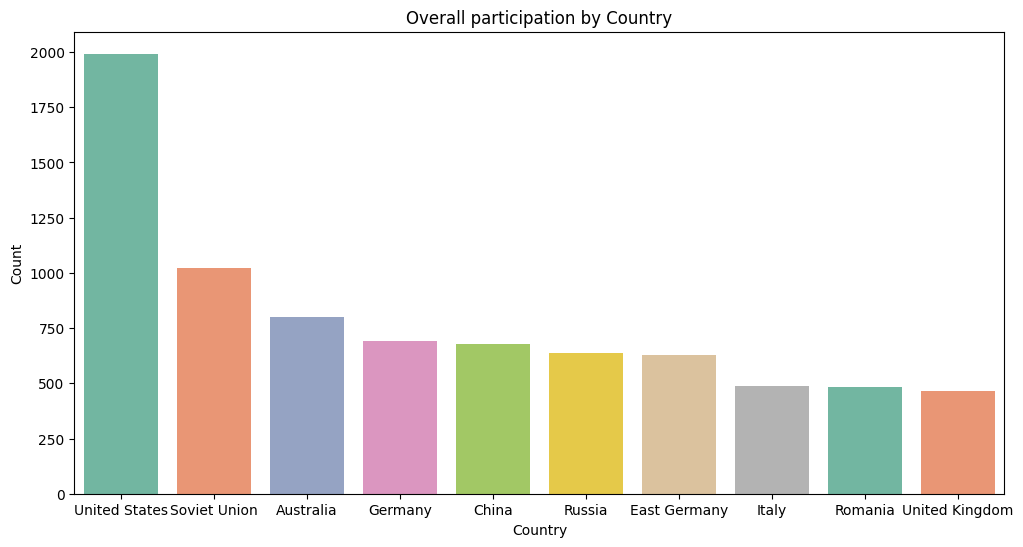

In [10]:
import pandas as pd
olympic = pd.read_csv("Summer-Olympic-medals-1976-to-2008 (1).csv")

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

Top_countries = olympic['Country'].value_counts()
Top_10_countries = Top_countries.head(10)

plt.figure(figsize=(12, 6))
plt.title('Overall participation by Country')
top_10_countries = Top_10_countries.reset_index()
top_10_countries.columns = ['Country','Count']
sns.barplot(x='Country', y='Count', data= top_10_countries, palette = 'Set2', hue='Country', legend = False);
          



In [14]:
bottom_10_countries = olympic.Country.value_counts().sort_values(ascending=False).tail(10)
bottom_10_countries


Country
Kuwait                  1
Uruguay                 1
Eritrea                 1
Macedonia               1
United Arab Emirates    1
Panama                  1
Mauritius               1
Sudan                   1
Togo                    1
Afghanistan             1
Name: count, dtype: int64

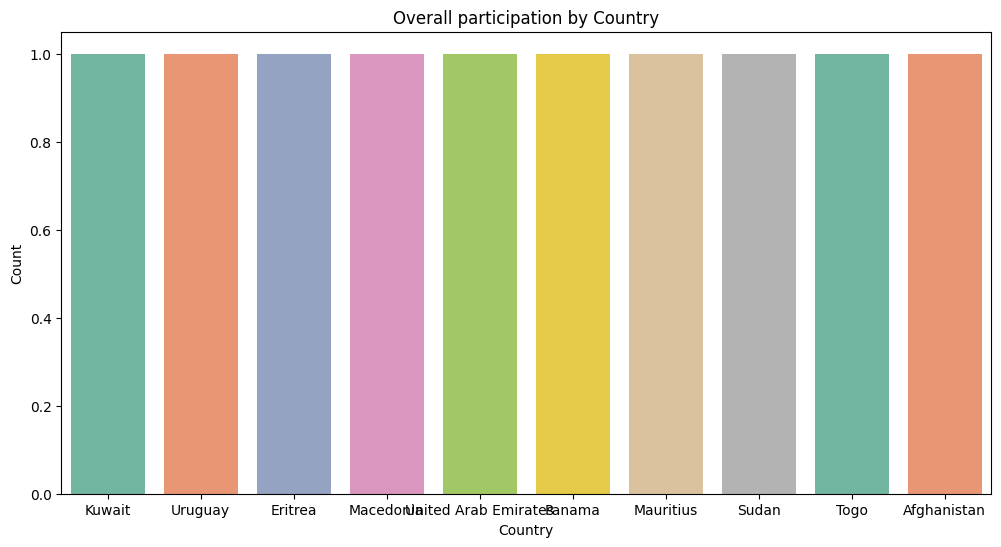

In [18]:
import pandas as pd
olympic = pd.read_csv("Summer-Olympic-medals-1976-to-2008 (1).csv")

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

Bottom_countries = olympic['Country'].value_counts()
Bottom_10_countries = Bottom_countries.tail(10)

plt.figure(figsize=(12, 6))
plt.title('Overall participation by Country')
bottom_10_countries = Bottom_10_countries.reset_index()
bottom_10_countries.columns = ['Country','Count']
sns.barplot(x='Country', y='Count', data= bottom_10_countries, palette = 'Set2', hue='Country', legend = False);
          

In [5]:
import pandas as pd
olympic = pd.read_csv("Summer-Olympic-medals-1976-to-2008 (1).csv")

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sports_list = olympic['Sport'].unique()
num_sports = len(sports_list)
print(f"\nThe number of unique sports played in the Olympics is: {num_sports}")
print("List of all unique sports:")
print(sports_list)


The number of unique sports played in the Olympics is: 29
List of all unique sports:
['Aquatics' 'Archery' 'Athletics' 'Basketball' 'Boxing' 'Canoe / Kayak'
 'Cycling' 'Equestrian' 'Fencing' 'Football' 'Gymnastics' 'Handball' nan
 'Hockey' 'Judo' 'Modern Pentathlon' 'Rowing' 'Sailing' 'Shooting'
 'Volleyball' 'Weightlifting' 'Wrestling' 'Table Tennis' 'Tennis'
 'Badminton' 'Baseball' 'Softball' 'Taekwondo' 'Triathlon']


In [3]:
import pandas as pd 
file_name = "Summer-Olympic-medals-1976-to-2008 (1).csv"
olympic = pd.read_csv(file_name)

gender_counts = olympic.Gender.value_counts()
gender_counts

Gender
Men      9388
Women    5928
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1dcaa285550>,
 [Text(-0.1847388352749887, -1.0843761168253572, 'Men'),
  Text(0.1847384819403912, 1.0843761770208529, 'Women')],
 [Text(-0.10076663742272109, -0.5914778819047403, '61.3%'),
  Text(0.10076644469475882, 0.591477914738647, '38.7%')])

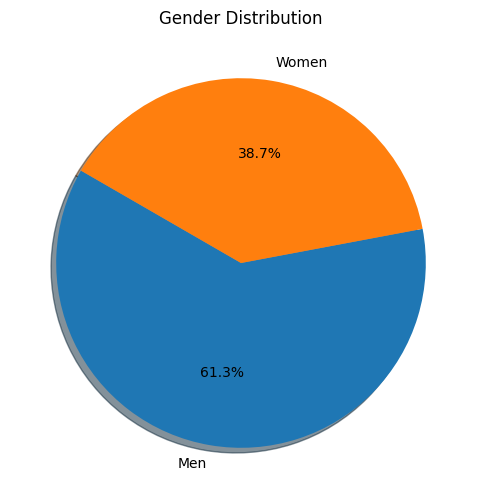

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.title("Gender Distribution")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=150, shadow=True)

In [9]:
olympic.Medal.value_counts()

Medal
Bronze    5258
Gold      5042
Silver    5016
Name: count, dtype: int64

In [21]:
female_participants = (olympic[olympic.Gender=='Women']
    .groupby('Year') ['Athlete']
    .count()
    .reset_index()
)
female_participants.rename(columns={'Athlete': 'Female_Participants_Count'}, inplace=True)

print(female_participants.head())

     Year  Female_Participants_Count
0  1976.0                        381
1  1980.0                        429
2  1984.0                        486
3  1988.0                        535
4  1992.0                        600


In [7]:
male_participants = (olympic[olympic.Gender=='Men']
    .groupby('Year') ['Athlete']
    .count()
    .reset_index()
)
male_participants.rename(columns={'Athlete': 'Male_Participants_Count'}, inplace=True)

print(male_participants.head())

     Year  Male_Participants_Count
0  1976.0                      924
1  1980.0                      958
2  1984.0                      973
3  1988.0                     1011
4  1992.0                     1105


In [5]:
import pandas as pd 
file_name = "Summer-Olympic-medals-1976-to-2008 (1).csv"
olympic = pd.read_csv(file_name)

initial_year = int(olympic['Year'].min())

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


gold_female_initial = olympic[
    (olympic['Year'] == initial_year) &
    (olympic['Gender'] == 'Women') &
    (olympic['Medal'] == 'Gold')
    ].copy()

gold_medal_wins = gold_female_initial[['Athlete', 'Sport']]
gold_medal_wins_unique = gold_medal_wins.drop_duplicates()

num_gold_medals = len(gold_medal_wins_unique)
print(f"Inital Olympic Edition: {'initial_year'}")
print(f"Total unique Gold Medals won by Female Athletes in: {'initial year'}:{'num_gold_medals'}")
print("\nFemale Gold Medal Winners and their resprctive Sports:")
print(gold_medal_wins_unique.to_string(index=False))
gold_medal_wins_unique.to_csv('initial_edition-female_gold_medals.csv', index=False)

Inital Olympic Edition: initial_year
Total unique Gold Medals won by Female Athletes in: initial year:num_gold_medals

Female Gold Medal Winners and their resprctive Sports:
                             Athlete         Sport
              VAYTSEKHOVSKAYA, Elena      Aquatics
              CHANDLER, Jennifer Kay      Aquatics
           BABASHOFF, Shirley Farber      Aquatics
                     ANKE, Hannelore      Aquatics
                       TH�MER, Petra      Aquatics
                   KOSHEVAYA, Marina      Aquatics
                     ENDER, Kornelia      Aquatics
                   PEYTON, Kim Marie      Aquatics
                     RICHTER, Ulrike      Aquatics
                      TAUBER, Ulrike      Aquatics
            BOGLIOLI, Wendy Lansbach      Aquatics
                     POLLACK, Andrea      Aquatics
                STERKEL, Gillian Ann      Aquatics
                   RYON, Luann Marie       Archery
             STROPAHL-STREIDT, Ellen     Athletics
       WIT

In [6]:
initial_year = int(olympic['Year'].min())

gold_male_initial = olympic[
    (olympic['Year'] == initial_year) &
    (olympic['Gender'] == 'Men') &
    (olympic['Medal'] == 'Gold')
    ].copy()

gold_medal_wins = gold_male_initial[['Athlete', 'Sport']]
gold_medal_wins_unique = gold_medal_wins.drop_duplicates()

num_gold_medals = len(gold_medal_wins_unique)
print(f"Inital Olympic Edition: {'initial_year'}")
print(f"Total unique Gold Medals won by Male Athletes in: {'initial year'}:{'num_gold_medals'}")
print("\nMale Gold Medal Winners and their resprctive Sports:")
print(gold_medal_wins_unique.to_string(index=False))
gold_medal_wins_unique.to_csv('initial_edition_male_gold_medals.csv', index=False)

Inital Olympic Edition: initial_year
Total unique Gold Medals won by Male Athletes in: initial year:num_gold_medals

Male Gold Medal Winners and their resprctive Sports:
                         Athlete             Sport
            BOGGS, Philip George          Aquatics
                  DIBIASI, Klaus          Aquatics
           GOODELL, Brian Stuart          Aquatics
           VOGEL, Matthew Haynes          Aquatics
            NABER, John Phillips          Aquatics
          MONTGOMERY, James Paul          Aquatics
            WILKIE, David Andrew          Aquatics
             BRUNER, Michael Lee          Aquatics
       FURNISS, Bruce Macfarlane          Aquatics
                STRACHAN, Rodney          Aquatics
         HENCKEN, John Frederick          Aquatics
                  HORKAI, Gyorgy          Aquatics
                    CSAPO, Gabor          Aquatics
               CSERVENYAK, Tibor          Aquatics
                GERENDAS, Gyorgy          Aquatics
              

In [5]:
import pandas as pd 
file_name = "Summer-Olympic-medals-1976-to-2008 (1).csv"
olympic = pd.read_csv(file_name)

gold_female_medals = olympic[
    (olympic['Gender'] == 'Women') &
    (olympic['Medal'] == 'Gold')
    ].copy()
athlete_gold_counts = gold_female_athlete_gold_counts.sort_values(ascending=False).head(5)
print("Female Athletes with the Most Gold Medals (1976-2008):")  
print(most_gold_athlete)


Female Athletes with the Most Gold Medals (1976-2008):
Athlete
FISCHER, Birgit    8
THOMPSON, Jenny    8
OTTO, Kristin      6
VAN DYKEN, Amy     6
WERTH, Isabell     5
Name: Medal, dtype: int64


In [7]:
gold_male_medals = olympic[
    (olympic['Gender'] == 'Men') &
    (olympic['Medal'] == 'Gold')
    ].copy()
athlete_gold_counts = gold_male_medals.groupby('Athlete')['Medal'].count()
most_gold_athlete = athlete_gold_counts.sort_values(ascending=False).head(5)
print("Male Athletes with the Most Gold Medals (1976-2008):")
print(most_gold_athlete)

Male Athletes with the Most Gold Medals (1976-2008):
Athlete
PHELPS, Michael       14
LEWIS, Carl            9
BIONDI, Matthew        8
ANDRIANOV, Nikolay     6
SCHERBO, Vitaly        6
Name: Medal, dtype: int64


In [8]:
import pandas as pd

file_name = "Summer-Olympic-medals-1976-to-2008 (1).csv"

# --- 1. Load the DataFrame ---
try:
    olympic = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    exit()

# --- NEW: Diagnostic Check (Always helpful!) ---
print("--- DataFrame Columns for Debugging ---")
print(olympic.columns.tolist())
print("-" * 55)

# --- 2. Analysis 1: Top 10 Disciplines by Total Medals ---

print("---  Analysis 1: Top 10 Disciplines by Total Medals (1976-2008)  ---")

try:
    # Corrected line for Discipline
    discipline_group = olympic.groupby('Discipline')['Medal'].count() 
    top_disciplines = discipline_group.sort_values(ascending=False).head(10)

    print(top_disciplines.to_string())
except KeyError as e:
    print(f"ERROR in Analysis 1: Column {e} not found. Check capitalization.")

print("-" * 55)


# --- 3. Analysis 2: Most Decorated Female Athletes ---

print("---  Analysis 2: Most Decorated Female Athletes by Total Medals ---")

try:
    # Filter data for all medals won by Female Athletes (Lines 41-45)
    # Ensure 'Gender', 'Medal', and 'Athlete' are capitalized correctly!
    female_medals = olympic[
        (olympic['Gender'] == 'Women') & 
        (olympic['Medal'].notna())
    ].copy()

    # Group by Athlete and count the total medals
    athlete_medal_counts = female_medals.groupby('Athlete')['Medal'].count()

    # Find the maximum medal count and the athlete(s) who achieved it
    max_medals = athlete_medal_counts.max()
    most_decorated_athletes = athlete_medal_counts[athlete_medal_counts == max_medals].index.tolist()

    # Format the results (Athlete, Total Medals, and Sport(s))
    results = []
    for athlete in most_decorated_athletes:
        # Get unique sports for this athlete
        sports = female_medals[female_medals['Athlete'] == athlete]['Sport'].unique().tolist()
        sport_str = " and ".join(sports)

        results.append({
            'Athlete': athlete,
            'Total Medals': max_medals,
            'Sport(s)': sport_str
        })

    results_df = pd.DataFrame(results)

    print(f"Female Athlete(s) tied with the highest count ({max_medals} medals):")
    print(results_df.to_string(index=False))

except KeyError as e:
    print(f"ERROR in Analysis 2 (Female Athlete): Column {e} not found. Check capitalization for 'Gender', 'Medal', or 'Athlete'.")

print("-" * 55)

--- DataFrame Columns for Debugging ---
['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender', 'Country_Code', 'Country', 'Event_gender', 'Medal']
-------------------------------------------------------
--- 🥇 Analysis 1: Top 10 Disciplines by Total Medals (1976-2008) 🥇 ---
Discipline
Athletics      1523
Swimming       1422
Rowing         1377
Hockey          817
Handball        780
Artistic G.     672
Football        669
Volleyball      647
Basketball      646
Fencing         606
-------------------------------------------------------
--- 👸 Analysis 2: Most Decorated Female Athletes by Total Medals ---
Female Athlete(s) tied with the highest count (12 medals):
        Athlete  Total Medals      Sport(s)
FISCHER, Birgit            12 Canoe / Kayak
THOMPSON, Jenny            12      Aquatics
   TORRES, Dara            12      Aquatics
-------------------------------------------------------


In [13]:
import pandas as pd

olympic = pd.read_csv("Summer-Olympic-medals-1976-to-2008 (1).csv")
male_medals = olympic[olympic['Gender'] == 'Men']
athlete_medal_counts = male_medals.groupby('Athlete').size().reset_index(name='Total_Medals')
sorted_medal_counts = athlete_medal_counts.sort_values(by='Total_Medals', ascending=False)
highest_medals_athlete = sorted_medal_counts.iloc[0]
athlete_name = highest_medals_athlete['Athlete']
medal_count = highest_medals_athlete['Total_Medals']
print("Analysis Complete:")
print("_" * 30)
print(f"The male athlete with the highest no. of medals is: (athlete_name)")
print(f"Total_Medals: {medal_count}")
print("\nTop 5 male3 athletes by Medal_Counts.head()")
print(sorted_medal_counts.head())

Analysis Complete:
______________________________
The male athlete with the highest no. of medals is: (athlete_name)
Total_Medals: 16

Top 5 male3 athletes by Medal_Counts.head()
                 Athlete  Total_Medals
4945     PHELPS, Michael            16
4509       NEMOV, Alexei            12
181   ANDRIANOV, Nikolay            12
592      BIONDI, Matthew            11
2361      HALL, Gary Jr.            10


In [17]:
# Encode categorical varialbles using LabelEncoder
olympic_cleaned = olympic.copy()
le = LabelEncoder()
olympic_cleaned['Country_Code'] = le.fit_transform(olympic_cleaned['Country_Code'])
olympic_cleaned['Sport'] = le.fit_transform(olympic_cleaned['Sport'])
olympic_cleaned['Gender'] = le.fit_transform(olympic_cleaned['Gender'])
olympic_cleaned['Event_gender'] = le.fit_transform(olympic_cleaned['Event_gender'])

olympic_cleaned['Medal'] = olympic_cleaned['Medal'].map({'Gold': 1, 'Silver': 1, 'Bronze': 1}).fillna(0)

# Features and Target 
X = olympic_cleaned[['Country_Code', 'Sport', 'Gender', 'Event_gender']]
Y = olympic_cleaned['Medal']

# Split The dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)



In [24]:
# Initialize and Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Predict on the test data
Y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy Score: 1.0
Confusion Matrix:
 [[  28    0]
 [   0 4602]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00      4602

    accuracy                           1.00      4630
   macro avg       1.00      1.00      1.00      4630
weighted avg       1.00      1.00      1.00      4630

